In [79]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    brier_score_loss,
    RocCurveDisplay
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
import json
from pathlib import Path
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import joblib
np.random.seed(42)

In [80]:
data = pd.read_csv("S06-hw-dataset-01.csv")
data.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [82]:
data.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [83]:
data.shape

(12000, 30)

In [84]:
data.value_counts("target",normalize=True)

target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

In [85]:
results = []
best_models = {}  # label -> fitted best estimator
search_summaries = {}  # label -> краткая инфа о подборе
metrics_to_see =list(data.keys())
metrics_to_see.remove("id")
metrics_to_see.remove("target")
X_train, X_test, y_train, y_test= sk.model_selection.train_test_split(data[metrics_to_see],data["target"],random_state=42,test_size=0.25,stratify=data["target"])

def compute_metrics(y_true, y_pred, y_proba=None) -> dict:
    m = {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1": float(f1_score(y_true, y_pred)),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            m["roc_auc"] = None
    else:
        m["roc_auc"] = None
    return m

def evaluate_on_test(model, X_test, y_test, label: str) -> dict:
    pred = model.predict(X_test)
    proba = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    metrics = compute_metrics(y_test, pred, proba)
    metrics["model"] = label
    return metrics

cv = sk.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def run_search(label: str, estimator, param_grid: dict):
    search = sk.model_selection.GridSearchCV(
        estimator,
        param_grid,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        refit=True,
        return_train_score=True
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    best_models[label] = best
    search_summaries[label] = {
        "best_params": search.best_params_,
        "best_cv_roc_auc": float(search.best_score_),
     
    }

def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)



In [86]:


dummy=sk.dummy.DummyClassifier(strategy="stratified",random_state=42)
dummy.fit(X_train, y_train)
y_pred=dummy.predict(X_test)
results.append(evaluate_on_test(dummy, X_test, y_test, "Dummy"))
best_models["Dummy"] = dummy

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))


Accuracy : 0.5623333333333334
Precision: 0.32446264073694986


In [87]:
lr = sk.pipeline.Pipeline([
    ("scaler", sk.preprocessing.StandardScaler()),
    ("lr", sk.linear_model.LogisticRegression(max_iter=4000, random_state=42))
])

lr_grid = {
    "lr__C": [0.1, 1.0, 10.0,100.0],
    "lr__penalty": ["l2"],
    "lr__solver": ["lbfgs"],
}
lr_search = sk.model_selection.GridSearchCV(
    lr, lr_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)
lr_search.fit(X_train, y_train)

best_lr = lr_search.best_estimator_
best_models["LogisticRegression"] = best_lr

search_summaries["LogisticRegression"] = {
    "best_params": lr_search.best_params_,
    "best_cv_roc_auc": float(lr_search.best_score_),
}

results.append(evaluate_on_test(best_lr, X_test, y_test, "LogisticRegression"))


c:\Users\study\Documents\VUZ\DpoAI\didactic-pancake-AI-stuff\homeworks\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [88]:
dt = DecisionTreeClassifier(random_state=42)

dt_grid = {
    "max_depth": [None, 3, 5, 8],
    "min_samples_leaf": [1, 5, 10, 20],
    "ccp_alpha": [0.0, 0.001, 0.005, 0.01],
}

dt_search = run_search("DecisionTree", dt, dt_grid)
search_summaries["DecisionTree"]
results.append(evaluate_on_test(best_models["DecisionTree"], X_test, y_test, "DecisionTree"))

In [89]:
rf = RandomForestClassifier(
    n_estimators=600,
    random_state=42,
    n_jobs=-1,
    oob_score=False
)

rf_grid = {
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", 0.5],
}

rf_search = run_search("RandomForest", rf, rf_grid)
search_summaries["RandomForest"]
results.append(evaluate_on_test(best_models["RandomForest"], X_test, y_test, "RandomForest"))

In [90]:
hgb = HistGradientBoostingClassifier(
    random_state=42,
    early_stopping=True
)

hgb_grid = {
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [2, 3, None],
    "max_leaf_nodes": [15, 31, 63],
}

hgb_search = run_search("HistGradientBoosting", hgb, hgb_grid)
search_summaries["HistGradientBoosting"]
results.append(evaluate_on_test(best_models["HistGradientBoosting"], X_test, y_test, "HistGradientBoosting"))
results

[{'accuracy': 0.5623333333333334,
  'f1': 0.3256291730868002,
  'roc_auc': 0.5008404855009903,
  'model': 'Dummy'},
 {'accuracy': 0.8296666666666667,
  'f1': 0.7146845337800112,
  'roc_auc': 0.878905083540704,
  'model': 'LogisticRegression'},
 {'accuracy': 0.8633333333333333,
  'f1': 0.7848898216159497,
  'roc_auc': 0.9105332385353713,
  'model': 'DecisionTree'},
 {'accuracy': 0.9346666666666666,
  'f1': 0.8942826321467098,
  'roc_auc': 0.97060992331522,
  'model': 'RandomForest'},
 {'accuracy': 0.9363333333333334,
  'f1': 0.8982418753329782,
  'roc_auc': 0.9746823421867858,
  'model': 'HistGradientBoosting'}]

Определяю лучшую модель по roc_auc

In [91]:
results = pd.DataFrame(results)
best = results[results['roc_auc'] == results['roc_auc'].max()]
results


,accuracy,f1,roc_auc,model
0,0.562333,0.325629,0.500840,Dummy
1,0.829667,0.714685,0.878905,LogisticRegression
2,0.863333,0.784890,0.910533,DecisionTree
3,0.934667,0.894283,0.970610,RandomForest
4,0.936333,0.898242,0.974682,HistGradientBoosting


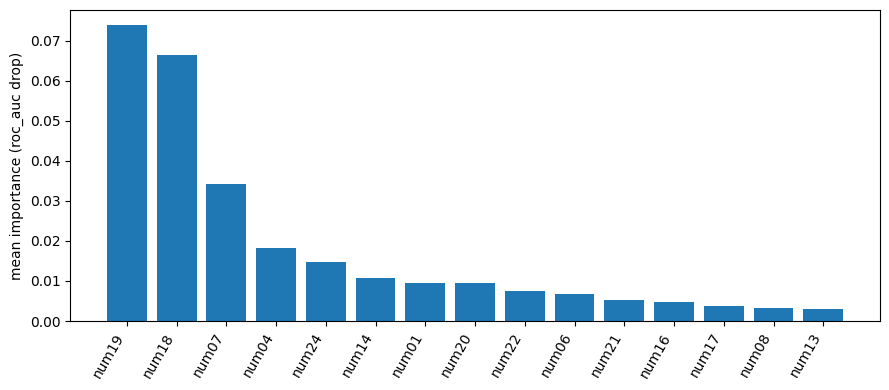

In [92]:
best_model=  best_models["HistGradientBoosting"]
perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=8,
    random_state=42,
    scoring="roc_auc"
)

imp = perm.importances_mean
idx = np.argsort(imp)[::-1][:15]

plt.figure(figsize=(9, 4))
plt.bar(range(len(idx)), imp[idx])
plt.xticks(range(len(idx)), [metrics_to_see[i] for i in idx], rotation=60, ha="right")
plt.ylabel(f"mean importance (roc_auc drop)")
plt.tight_layout()
plt.savefig("artifacts/figures/permutation.png")
plt.show()


In [93]:
df = pd.DataFrame(results)
ARTIFACTS_DIR = Path("artifacts")
metrics_path = ARTIFACTS_DIR / "metrics_test.json"
search_path = ARTIFACTS_DIR / "search_summaries.json"

df_sorted = df.copy()
df_sorted["roc_auc_sort"] = df_sorted["roc_auc"].fillna(-1.0)
df_sorted = df_sorted.sort_values(["roc_auc_sort", "accuracy"], ascending=False).drop(columns=["roc_auc_sort"])
metrics_dict= {i["model"]:{"accuracy":i['accuracy'],"f1":i['f1'],"roc_auc":i['roc_auc'] } for i in df_sorted.to_dict(orient="records")}
save_json(metrics_dict, metrics_path)
save_json(search_summaries, search_path)

In [94]:
model_path = ARTIFACTS_DIR / "best_model.joblib"
joblib.dump(best_model, model_path)

meta = {
    "best_model_label": best['model'].iloc[0],
    "test_metrics": best.set_index("accuracy").to_dict(),
    "search_summary": search_summaries.get(best["model"].iloc[0], None),
    "random_state": 42
}
save_json(meta, ARTIFACTS_DIR / "best_model_meta.json")

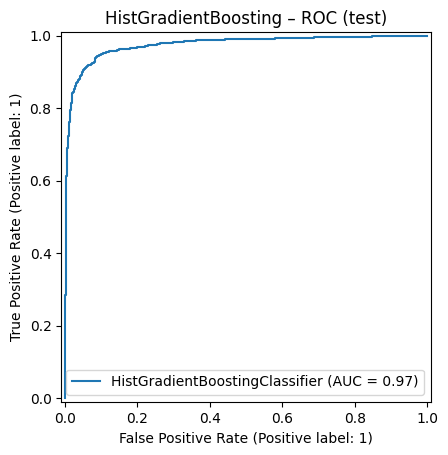

In [95]:
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title(f"{best["model"].iloc[0]} – ROC (test)")
plt.savefig(ARTIFACTS_DIR/"figures/roc-auc_best.png")
plt.show()